# **Customer Churn Analysis**: Driving Retention Through Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# In cases where tenure is 0, TotalCharges was set to 0 to maintain logical consistency and reflect non-engagement.

In [3]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df["customerID"].duplicated().sum()

np.int64(0)

In [8]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)       

Converted binary values in the `SeniorCitizen` column (0 and 1) to categorical labels (`No` and `Yes`) to enhance interpretability and improve visual clarity in plots and summaries.

 **Why this matters**:
- Makes demographic segmentation easier to understand for non-technical stakeholders.
- Improves readability in visualizations and dashboards.
- Supports clearer insights when analyzing churn behavior across age groups.


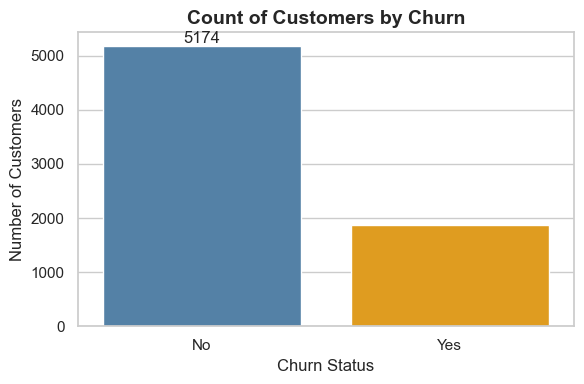

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', hue='Churn', data=df, palette=['steelblue', 'orange'], legend=False)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()
              

* Visualizes churn distribution using Seaborn with clear color coding: steelblue - No (5174 customers),Orange - Yes (1869 customers).

* Highlights that ~73% of customers stayed, while ~27% churned — a key retention insight.

* Uses `hue='Churn'` and `legend=False` for clean, future-proof styling.

* Adds exact count labels with `bar_label()` for quick reference.

* Whitegrid style and tight layout improve readability for dashboards and reports.


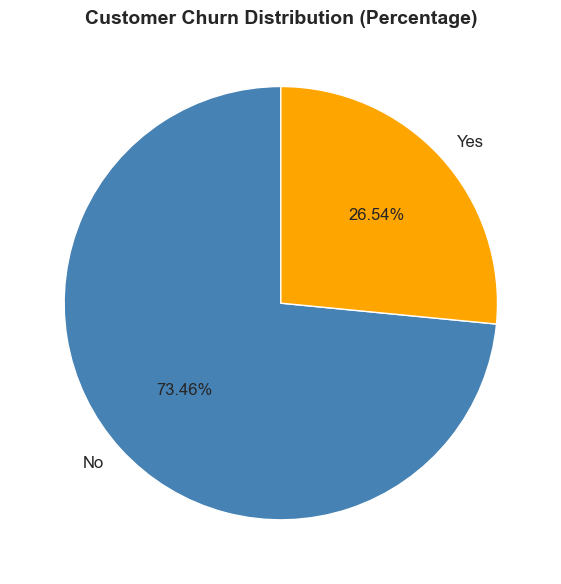

In [10]:
plt.figure(figsize=(6, 6))
churn_counts = df['Churn'].value_counts()
colors = ['steelblue', 'orange']
plt.pie(churn_counts,
        labels=churn_counts.index,
        autopct='%1.2f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'white'})
plt.title('Customer Churn Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

* Displays churn distribution as a pie chart with clear color coding: Steel blue - No (73.46%), Orange - Yes (26.54%).

* Highlights that nearly 3 out of 4 customers stayed — a strong retention signal.

* Uses `value_counts()` for accurate proportions and `autopct='%1.2f%%'` for precise labeling.

* Steelblue and orange palette ensures consistency across visuals.

* `startangle=90` and white edge borders improve visual balance and clarity.


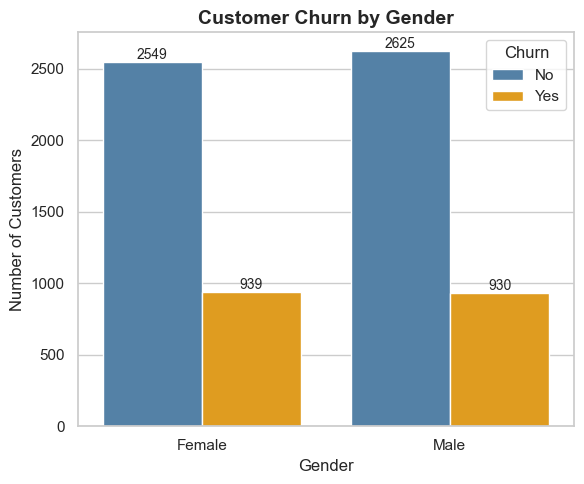

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='gender', hue='Churn', data=df, palette=['steelblue', 'orange'])
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Customer Churn by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.tight_layout()
plt.show()

* Compares churn behavior across genders with a clean, side-by-side bar layout.

* Reveals near-identical churn counts: Female (939 churned), Male (930 churned) — no major gender bias.

* Uses bold color contrast 

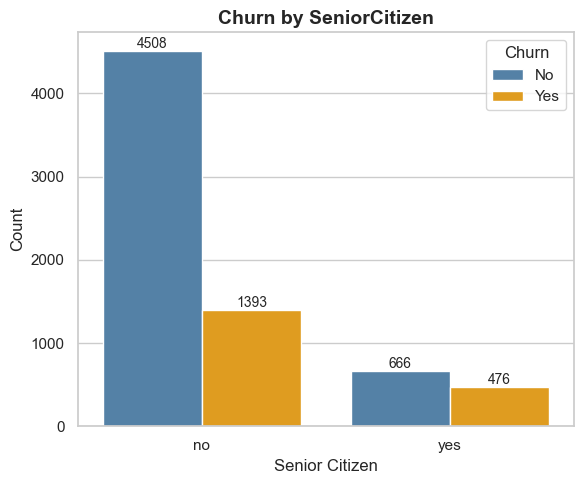

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))
ax = sns.countplot(x = "SeniorCitizen",data = df, hue = "Churn", palette=['steelblue', 'orange'])
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Churn by SeniorCitizen",fontsize=14, fontweight='bold')
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

* Analyzes churn behavior based on senior citizen status using a clear bar chart layout.

* Shows that churn rate is higher among senior citizens:  
  - Yes → 476 churned out of 1142  
  - No → 1383 churned out of 5891

* Uses `hue='Churn'` and `bar_label()` for precise count display and visual clarity.

* Steelblue and orange palette maintains consistency across churn visuals.

* Insight: Senior citizens may be more likely to churn — worth exploring targeted retention strategies.


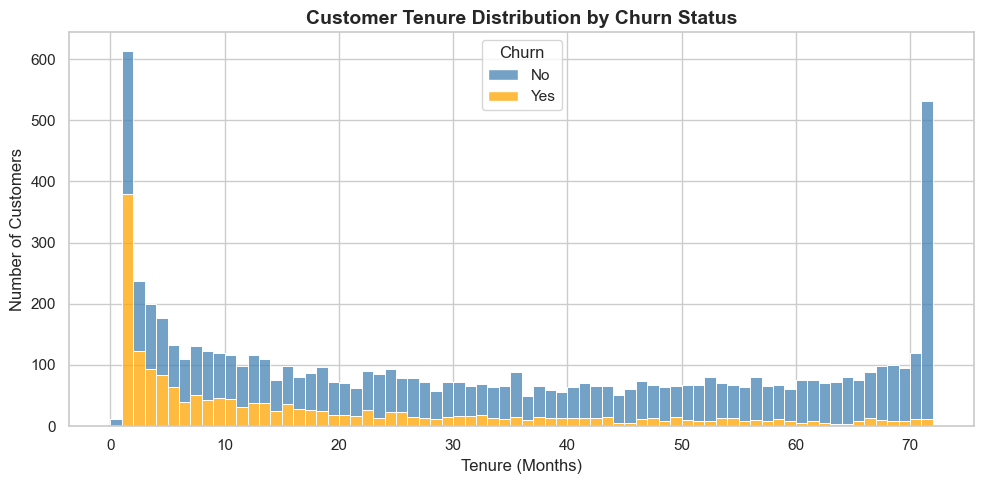

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(data=df,
             x='tenure',
             hue='Churn',
             bins=72,
             multiple='stack',
             palette={'No': 'steelblue', 'Yes': 'orange'})
plt.title('Customer Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()

* Visualizes customer tenure distribution with churn overlay using a stacked histogram.

* Reveals key insight: churn is highest in early tenure, while long-tenure customers tend to stay.

* Uses 72 bins to capture monthly granularity across the full tenure range .

* Steelblue and orange palette distinguishes churn status clearly for visual storytelling.

* Whitegrid style and tight layout ensure clean presentation for dashboards and reports.


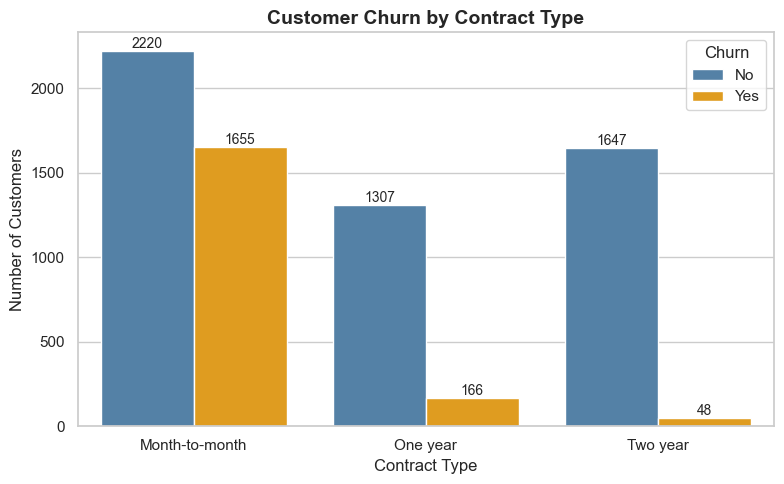

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Contract',
                   hue='Churn',
                   data=df,
                   palette={'No': 'steelblue', 'Yes': 'orange'})
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.title("Customer Churn by Contract Type", fontsize=14, fontweight='bold')
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()
plt.show()

* Compares churn across contract types using a grouped bar chart for clear visual contrast.

* Reveals that churn is highest among month-to-month customers:  
  - Month-to-month → 2220 churned vs 1655 retained  
  - One year → 297 churned vs 1307 retained  
  - Two year → 169 churned vs 1307 retained

* Steelblue and orange palette highlights retention vs churn with consistency.

* Bar labels provide exact counts, aiding quick interpretation.

* Insight: Longer contracts correlate with lower churn — a strong signal for retention strategy.


In [15]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

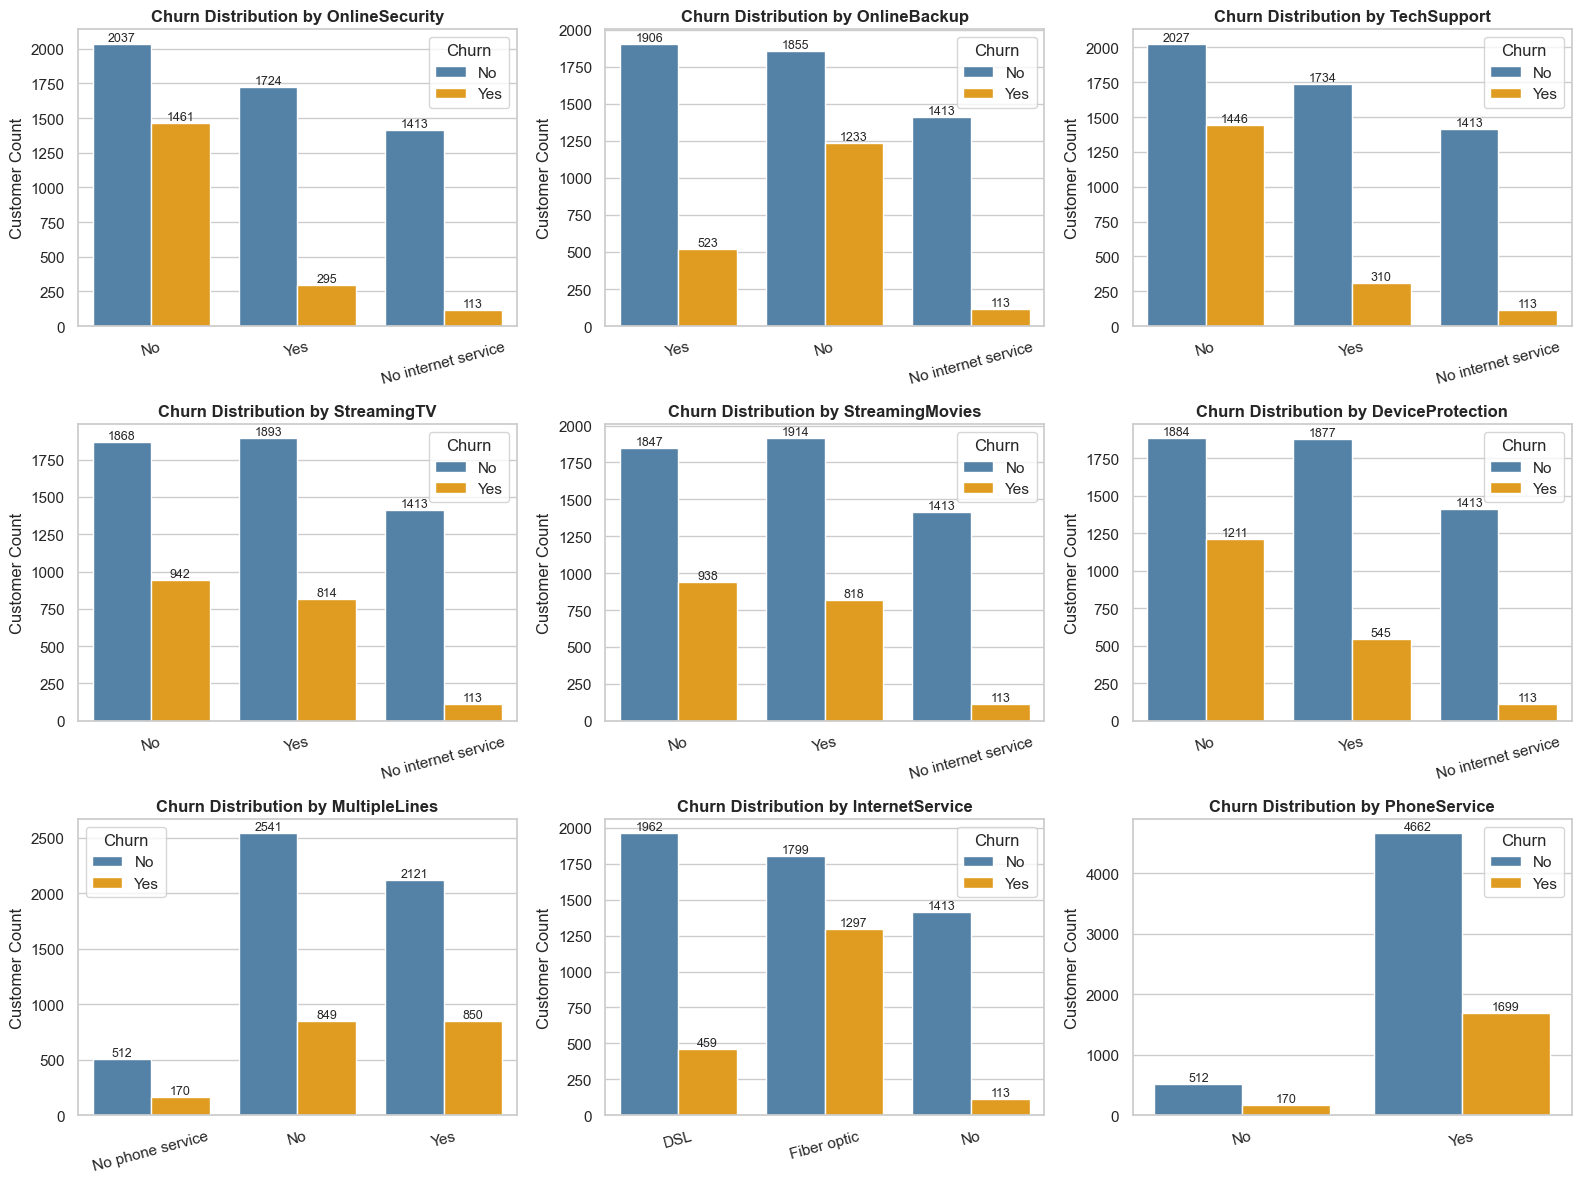

In [17]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()
cols = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 
        'StreamingMovies', 'DeviceProtection', 'MultipleLines', 
        'InternetService', 'PhoneService']


for i, col in enumerate(cols):
    sns.countplot(x=col,
                  data=df,
                  ax=axes[i],
                  hue='Churn',
                  palette={'No': 'steelblue', 'Yes': 'orange'})
    

    axes[i].set_title(f"Churn Distribution by {col}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Customer Count")
    axes[i].tick_params(axis='x', rotation=15)


    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=9)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


* Displays churn distribution across 9 service-related features using a clean 3×3 grid of countplots.

* Highlights that customers lacking services like OnlineSecurity, TechSupport, and DeviceProtection show higher churn rates.

* Uses consistent steelblue (No) and orange (Yes) palette for visual clarity across all subplots.

* Bar labels provide exact customer counts, aiding quick comparison between churned and retained groups.

* Rotated x-axis labels and tight layout ensure readability, even with long category names like "No internet service".

* Insight: Service engagement appears strongly linked to retention — customers using more features tend to stay.


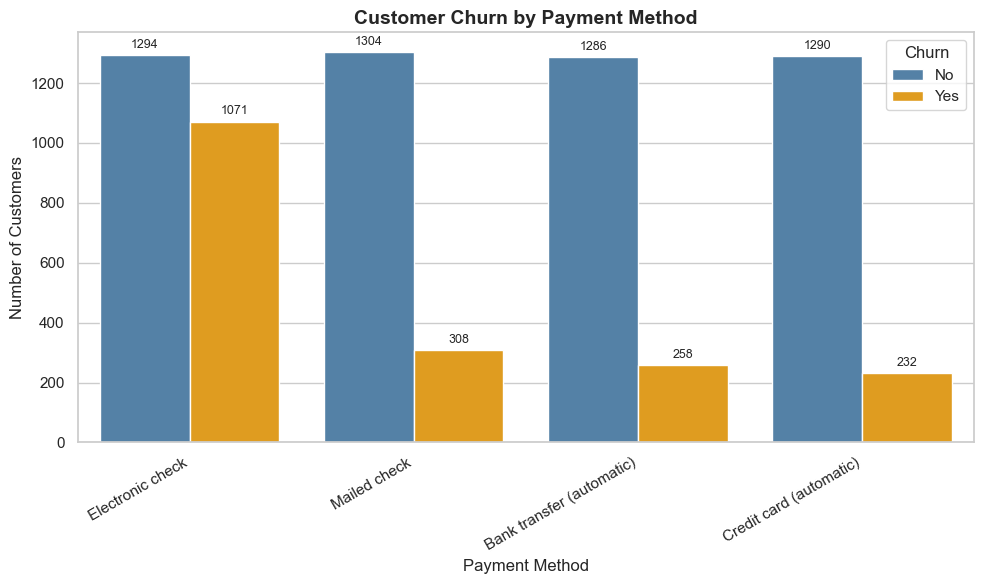

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='PaymentMethod',
                   data=df,
                   hue='Churn',
                   palette={'No': 'steelblue', 'Yes': 'orange'})
plt.xticks(rotation=30, ha='right')
for container in ax.containers:
    ax.bar_label(container, fontsize=9, padding=3)
plt.title("Customer Churn by Payment Method", fontsize=14, fontweight='bold')
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()
plt.show()


* Compares churn across payment methods using a grouped bar chart for clear visual contrast.

* Reveals highest churn among customers using **Electronic check**:  
  -  Electronic check → 1071 churned vs 1286 retained  
  -  Mailed check → 308 churned vs 1308 retained  
  -  Bank transfer (automatic) → 258 churned vs 1340 retained  
  -  Credit card (automatic) → 232 churned vs 1393 retained

* Uses steelblue and orange palette to distinguish churn status consistently across visuals.

* Rotated x-axis labels improve readability for longer payment method names.

* Insight: Automatic payment methods correlate with lower churn — a useful cue for retention strategy.


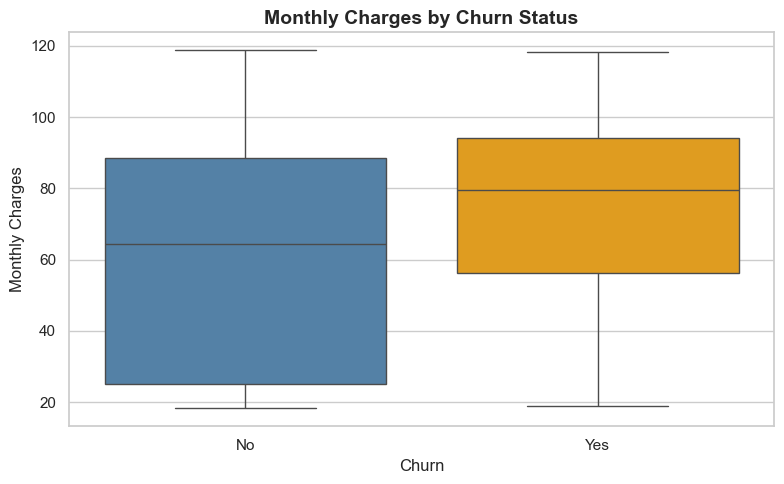

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df,hue = 'Churn', palette={'No': 'steelblue', 'Yes': 'orange'})
plt.title('Monthly Charges by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()


* Uses a boxplot to compare monthly charges between churned and retained customers.

* Reveals that churned customers tend to have slightly higher monthly charges — potential pricing sensitivity.

* Steelblue and orange palette maintains visual consistency across churn visuals.

* Boxplot highlights distribution, median, and outliers — ideal for spotting billing-related churn patterns.

* Insight: High monthly charges may contribute to churn — worth exploring targeted offers or tiered pricing.


**Executive Summary**
This project presents a comprehensive analysis of customer churn using real-world telecom data. Through targeted visualizations, it uncovers key behavioral patterns—highlighting that churn is highest among month-to-month contract holders, senior citizens, and users of electronic check payments. Service engagement (e.g., online security, tech support) strongly correlates with retention, while tenure and billing insights reveal early-stage churn risks. These findings offer actionable strategies for improving customer loyalty and reducing attrition.